In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("rainwater_harvesting_dataset.csv")

In [3]:
df.head

<bound method NDFrame.head of       Roof_Area_m2  Rainfall_mm  Runoff_Coefficient  Tank_Size_Liters  \
0           124.87       155.72                0.86             15000   
1           286.20       139.84                0.66              5000   
2           224.96        78.70                0.72              1000   
3           187.62       246.83                0.83             15000   
4            63.69       195.88                0.77             15000   
...            ...          ...                 ...               ...   
9995        260.14       352.05                0.93             10000   
9996        271.30        28.26                0.86              1000   
9997        285.08       128.44                0.61              2000   
9998        131.30       182.89                0.74              2000   
9999         80.80        77.18                0.69              5000   

      Liters_Captured  
0            16638.12  
1            26579.58  
2            12791.29

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Roof_Area_m2        10000 non-null  float64
 1   Rainfall_mm         10000 non-null  float64
 2   Runoff_Coefficient  10000 non-null  float64
 3   Tank_Size_Liters    10000 non-null  int64  
 4   Liters_Captured     10000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


In [5]:
df.describe()

,Roof_Area_m2,Rainfall_mm,Runoff_Coefficient,Tank_Size_Liters,Liters_Captured
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,158.364656,206.766658,0.775044,6577.600000,25288.925263
std,80.536395,112.824844,0.100406,5206.984685,20498.696997
min,20.000000,10.060000,0.600000,1000.000000,240.520000
25%,88.975000,109.040000,0.690000,2000.000000,8783.130000
50%,157.910000,207.300000,0.780000,5000.000000,19535.890000
75%,227.200000,305.030000,0.860000,10000.000000,37407.997500
max,299.920000,399.970000,0.950000,15000.000000,107300.350000


In [6]:
# check for missing values
print(df.isnull().sum())

Roof_Area_m2          0
Rainfall_mm           0
Runoff_Coefficient    0
Tank_Size_Liters      0
Liters_Captured       0
dtype: int64


In [7]:
print(df.dtypes)

Roof_Area_m2          float64
Rainfall_mm           float64
Runoff_Coefficient    float64
Tank_Size_Liters        int64
Liters_Captured       float64
dtype: object


In [8]:
# remove duplicates
df = df.drop_duplicates()

In [9]:
df.describe()

,Roof_Area_m2,Rainfall_mm,Runoff_Coefficient,Tank_Size_Liters,Liters_Captured
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,158.364656,206.766658,0.775044,6577.600000,25288.925263
std,80.536395,112.824844,0.100406,5206.984685,20498.696997
min,20.000000,10.060000,0.600000,1000.000000,240.520000
25%,88.975000,109.040000,0.690000,2000.000000,8783.130000
50%,157.910000,207.300000,0.780000,5000.000000,19535.890000
75%,227.200000,305.030000,0.860000,10000.000000,37407.997500
max,299.920000,399.970000,0.950000,15000.000000,107300.350000


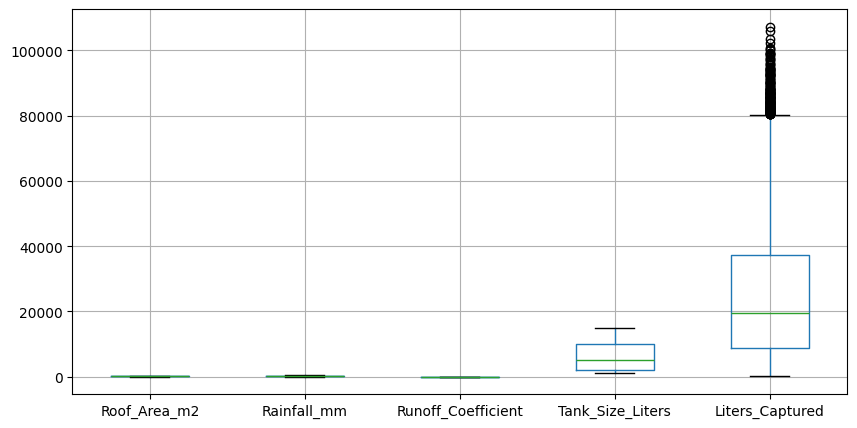

In [10]:
# to check outliers
import matplotlib.pyplot as plt
df.boxplot(figsize=(10,5))
plt.show()

In [11]:
#Data Visualization

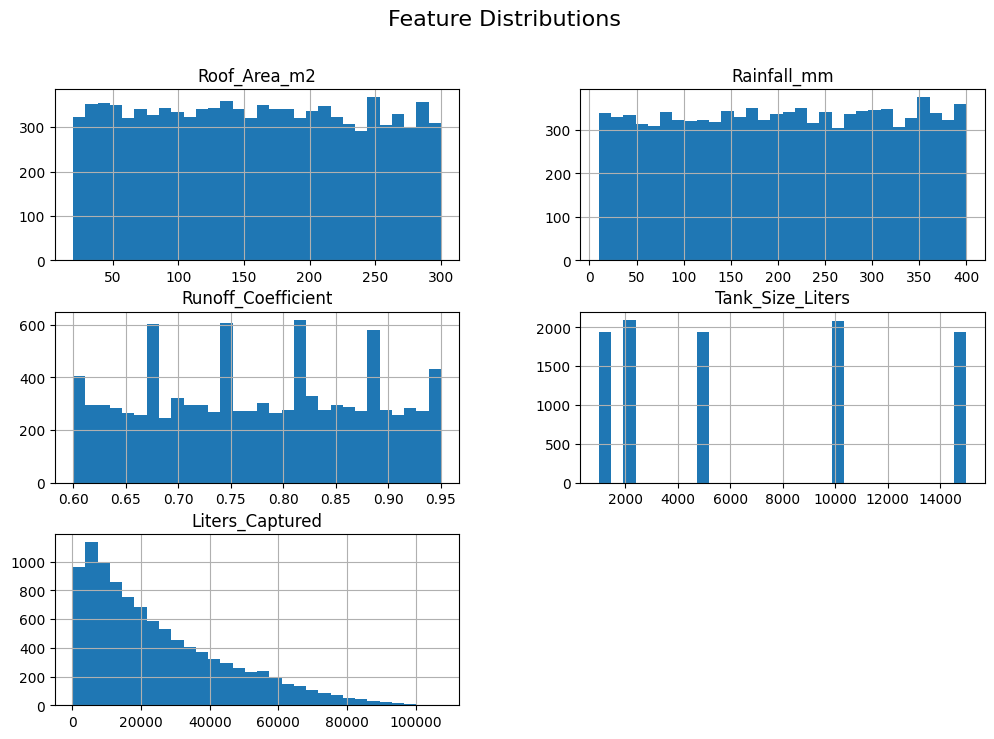

In [12]:
# 1. Histograms
df.hist(bins=30, figsize=(12,8))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

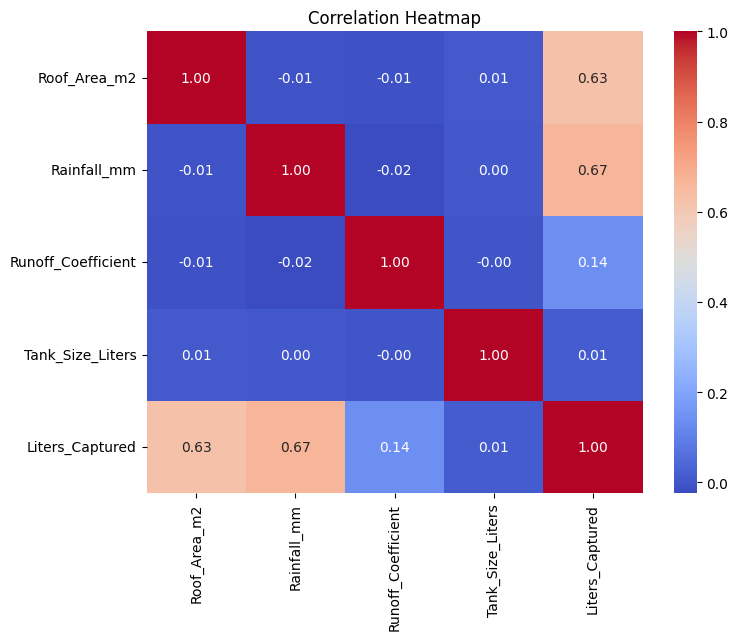

In [13]:
# 2. Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

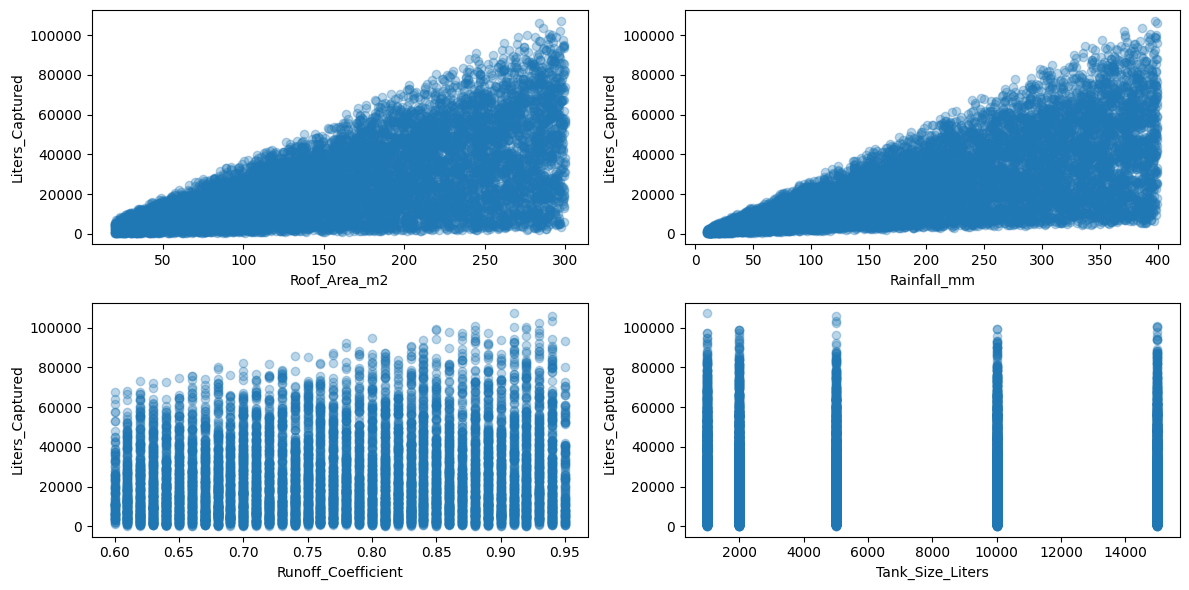

In [14]:
# 3. Scatter plots
plt.figure(figsize=(12,6))
for i, col in enumerate(["Roof_Area_m2", "Rainfall_mm", "Runoff_Coefficient", "Tank_Size_Liters"]):
    plt.subplot(2,2,i+1)
    plt.scatter(df[col], df["Liters_Captured"], alpha=0.3)
    plt.xlabel(col)
    plt.ylabel("Liters_Captured")
plt.tight_layout()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df[['Roof_Area_m2', 'Rainfall_mm']]
y = df['Liters_Captured']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)


X_train: (8000, 2) X_test: (2000, 2)


In [17]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print("Intercept:", linreg.intercept_)
print("Coefficients:", dict(zip(X.columns, linreg.coef_)))


Intercept: -25126.917433412247
Coefficients: {'Roof_Area_m2': 159.70976656525391, 'Rainfall_mm': 121.30147122493835}


In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = linreg.predict(X_test)

r2  = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


R²: 0.8469
MAE: 6245.75
RMSE: 8123.44


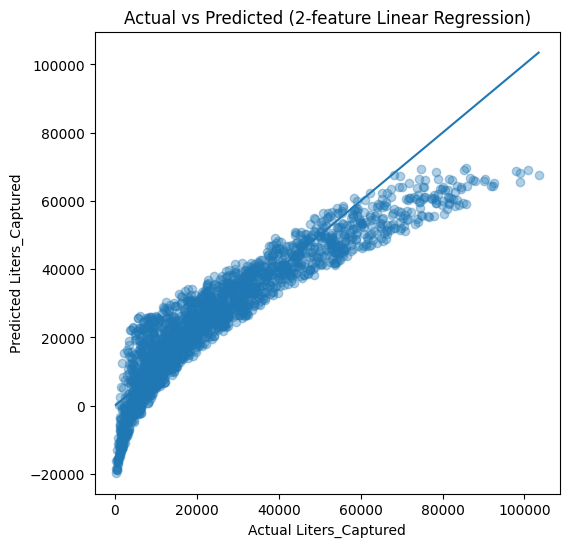

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.35)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual Liters_Captured")
plt.ylabel("Predicted Liters_Captured")
plt.title("Actual vs Predicted (2-feature Linear Regression)")
plt.show()


In [20]:
# Updated features with all columns (excluding the target)
X_full = df[['Roof_Area_m2', 'Rainfall_mm', 'Runoff_Coefficient', 'Tank_Size_Liters']]
y = df['Liters_Captured']

# Split the data again with all features
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_full, y, test_size=0.20, random_state=42
)

# Initialize and train a new linear regression model
linreg_full = LinearRegression()
linreg_full.fit(X_train_full, y_train)

# Make predictions and evaluate the new model
y_pred_full = linreg_full.predict(X_test_full)

r2_full = r2_score(y_test, y_pred_full)
mae_full = mean_absolute_error(y_test, y_pred_full)
rmse_full = np.sqrt(mean_squared_error(y_test, y_pred_full))

print("Model with all features:")
print(f"R²: {r2_full:.4f}")
print(f"MAE: {mae_full:.2f}")
print(f"RMSE: {rmse_full:.2f}")

# Compare with the previous model
print("\nPrevious model (2 features):")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

Model with all features:
R²: 0.8730
MAE: 5419.28
RMSE: 7398.37

Previous model (2 features):
R²: 0.8469
MAE: 6245.75
RMSE: 8123.44


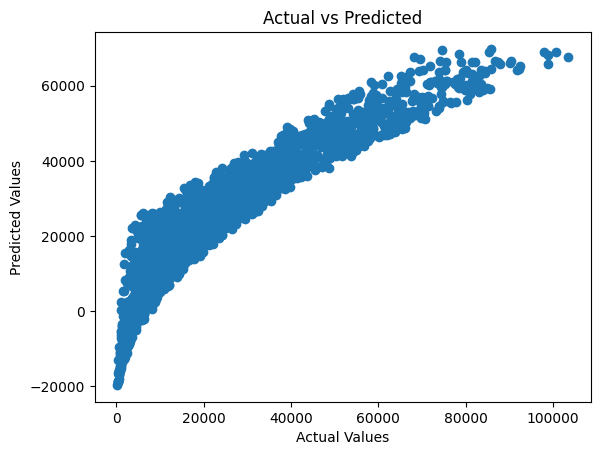

In [21]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


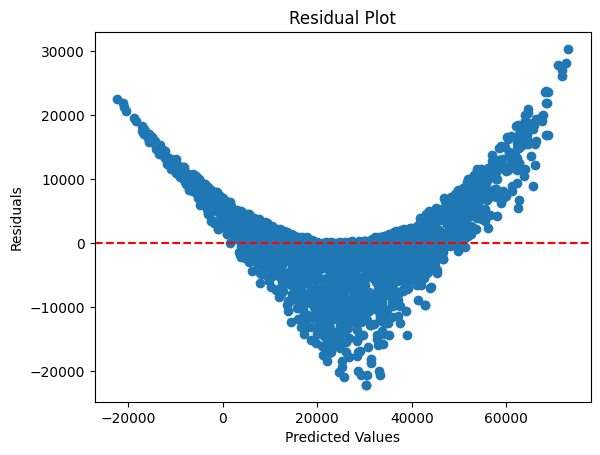

In [22]:
residuals = y_test - y_pred_full
plt.scatter(y_pred_full, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linreg_full, X_full, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", scores)
print("Average R²:", scores.mean())


Cross-validation R² scores: [0.86769587 0.86347165 0.86469894 0.87168367 0.87077265]
Average R²: 0.8676645561563451


In [24]:
coeff_df = pd.DataFrame({
    'Feature': X_full.columns,
    'Coefficient': linreg_full.coef_
})
print(coeff_df)



              Feature   Coefficient
0        Roof_Area_m2    160.114187
1         Rainfall_mm    122.286487
2  Runoff_Coefficient  32599.945849
3    Tank_Size_Liters      0.002999


In [25]:
import joblib
joblib.dump(linreg_full, 'rainwater_harvesting_model.pkl')

print("Model saved successfully as 'rainwater_harvesting_model.pkl'")

Model saved successfully as 'rainwater_harvesting_model.pkl'
